<a href="https://colab.research.google.com/github/karen1203/LimpiezaCredicel/blob/main/Propuesta_uno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
credi= pd.read_excel("cuentas_credicel.xlsx")

In [137]:
credi

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,0,0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,0,0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,NaT,NaN,NaN,Cancelado,0.00,0.00,0.0,0,0,NaN
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,0,0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,2022-03-12,Mora,0.0,0,0.00,0.00,0.0,NaN,NaN,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,2023-04-25,NaN,NaN,10,27.40,-1.13,0.0,0,"K0,J0,D8,E2",0
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,2023-04-25,NaN,NaN,9,19.00,7.48,0.0,0,"K0,J0,D8,E2",0
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,2023-04-25,NaN,NaN,11,26.65,0.75,0.0,0,"K0,D7,F7,D8",0
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,2023-04-25,NaN,NaN,14,-17.35,-0.14,0.0,0,"J0,G1,E0,E2",0


In [138]:
credi.isnull().sum()

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         4197
puntos                3595
riesgo                2473
porc_enganche         2473
porc_tasa                0
score_buro               0
razones_buro          4505
semana_actual         4505
codigo_postal          685
dtype: int64

In [139]:
credi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

No puede haber medio fraudes entonces, entonces la mayoría no tienen ni un fraude, por lo quie se llena con la moda

In [140]:
credi['fraude'].mode()

0    0
Name: fraude, dtype: int64

Como son fechas en desorden no predecibles, por lo que se dejan en fechas desconocidas

In [141]:
credi['fecha_ultimo_pago']=credi['fecha_ultimo_pago'].fillna('Desconocido')

In [142]:
credi['fecha_pago_proximo']=credi['fecha_pago_proximo'].fillna('Desconocido')

Los status de cuenta son Al corriente, Atraso, Mora, Fraude y los espacios en blanco significa que no se ha determinado el estatus, por lo que se deja como "Blanco"

In [143]:
credi['status_cuenta']=credi['status_cuenta'].fillna('Blanco')

Los puntos depende de los clientes y sus situaciones, así que lo hice por el promedio redondeado.

In [144]:
credi["puntos"]=credi["puntos"].fillna(round(credi["puntos"].mean(),0))

In [145]:
credi['riesgo'] = credi['riesgo'].replace('Cancelado', 104)
credi['riesgo'] = credi['riesgo'].replace('Fraude', 105)
credi['riesgo'] = credi['riesgo'].replace('Atraso', 106)
credi['riesgo'] = pd.to_numeric(credi['riesgo'])

In [146]:
def categorize_riesgo(parametros):
    if pd.isna(parametros):
        return None
    if parametros <= 0:
        return 'No hay riesgo'
    elif 0 <= parametros <= 51:
        return 'Poco riesgo'
    elif 52 <= parametros <= 99:
        return 'Riesgo considerable'
    elif 100 <= parametros <= 103:
        return 'Hay riesgo alto'
    elif parametros == 167:
        return 'Cancelado'
    elif parametros == 169:
        return 'Fraude'
    elif parametros == 171:
        return 'Atraso'

credi['riesgo_categorizado'] = credi['riesgo'].apply(categorize_riesgo)

In [147]:
credi['riesgo_categorizado']

0                 None
1                 None
2                 None
3                 None
4        No hay riesgo
             ...      
22730      Poco riesgo
22731      Poco riesgo
22732      Poco riesgo
22733      Poco riesgo
22734      Poco riesgo
Name: riesgo_categorizado, Length: 22735, dtype: object

In [148]:
credi

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,riesgo_categorizado
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,Blanco,14.0,NaN,NaN,0.00,0.0,0,0,0,None
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,Blanco,14.0,NaN,NaN,0.00,0.0,0,0,0,None
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,Blanco,14.0,104.0,0.00,0.00,0.0,0,0,NaN,None
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,Blanco,14.0,NaN,NaN,0.00,0.0,0,0,0,None
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,Mora,0.0,0.0,0.00,0.00,0.0,NaN,NaN,74,No hay riesgo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,Blanco,14.0,10.0,27.40,-1.13,0.0,0,"K0,J0,D8,E2",0,Poco riesgo
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,Blanco,14.0,9.0,19.00,7.48,0.0,0,"K0,J0,D8,E2",0,Poco riesgo
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,Blanco,14.0,11.0,26.65,0.75,0.0,0,"K0,D7,F7,D8",0,Poco riesgo
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,Blanco,14.0,14.0,-17.35,-0.14,0.0,0,"J0,G1,E0,E2",0,Poco riesgo


In [149]:
credi=credi.drop('riesgo', axis=1)

In [150]:
credi

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,fecha_pago_proximo,status_cuenta,puntos,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,riesgo_categorizado
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,Desconocido,Blanco,14.0,NaN,0.00,0.0,0,0,0,None
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,Desconocido,Blanco,14.0,NaN,0.00,0.0,0,0,0,None
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,Desconocido,Blanco,14.0,0.00,0.00,0.0,0,0,NaN,None
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,Desconocido,Blanco,14.0,NaN,0.00,0.0,0,0,0,None
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,2022-03-12 00:00:00,Mora,0.0,0.00,0.00,0.0,NaN,NaN,74,No hay riesgo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,2023-04-25 00:00:00,Blanco,14.0,27.40,-1.13,0.0,0,"K0,J0,D8,E2",0,Poco riesgo
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,2023-04-25 00:00:00,Blanco,14.0,19.00,7.48,0.0,0,"K0,J0,D8,E2",0,Poco riesgo
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,2023-04-25 00:00:00,Blanco,14.0,26.65,0.75,0.0,0,"K0,D7,F7,D8",0,Poco riesgo
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,2023-04-25 00:00:00,Blanco,14.0,-17.35,-0.14,0.0,0,"J0,G1,E0,E2",0,Poco riesgo


In [151]:
Counter(credi['riesgo_categorizado'])

Counter({None: 3357,
         'No hay riesgo': 7995,
         'Poco riesgo': 11348,
         'Riesgo considerable': 34,
         'Hay riesgo alto': 1})

In [152]:
credi.isnull().sum()

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                  13
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago         0
fecha_pago_proximo        0
status_cuenta             0
puntos                    0
porc_enganche          2473
porc_tasa                 0
score_buro                0
razones_buro           4505
semana_actual          4505
codigo_postal           685
riesgo_categorizado    3357
dtype: int64

In [153]:
credi["riesgo_categorizado"]=credi["riesgo_categorizado"].fillna("Poco riesgo")

In [154]:
credi["porc_enganche"]=credi["porc_enganche"].fillna(round(credi["porc_enganche"].mean(),0))

In [155]:
credi["razones_buro"]=credi["razones_buro"].fillna("Desconocido")

In [156]:
credi["razones_buro"]=credi["razones_buro"].fillna("Desconocido")

In [157]:
credi["semana_actual"]=credi["semana_actual"].fillna("Desconocido")

In [158]:
credi["codigo_postal"]=credi["codigo_postal"].fillna("Desconocido")

In [159]:
credi.isnull().sum()

folio                   0
tag                     0
folio_solicitud         0
fecha                   0
marca                   0
modelo                  0
plazo                   0
precio                  0
enganche                0
descuento               0
semana                  0
monto_financiado        0
costo_total             0
monto_accesorios        0
agente_venta            0
dis_venta               0
status                  0
fraude                  0
empresa                13
inversion               0
pagos_realizados        0
reautorizacion          0
fecha_ultimo_pago       0
fecha_pago_proximo      0
status_cuenta           0
puntos                  0
porc_enganche           0
porc_tasa               0
score_buro              0
razones_buro            0
semana_actual           0
codigo_postal           0
riesgo_categorizado     0
dtype: int64

In [160]:
from collections import Counter

In [161]:
Counter(credi['empresa'])

Counter({'microtec': 9310,
         'Sistemas': 1,
         'compercel': 174,
         'semfactory': 3,
         'apartacel': 324,
         'aespinosa': 221,
         'procredito': 697,
         'comunicatec': 1020,
         'laragrajales': 24,
         'martz': 14,
         'linetelc': 172,
         'emnagar': 81,
         'servicel': 7348,
         'yaavs': 258,
         'hashtag': 1,
         'texpress': 396,
         'quality': 71,
         'drmedia': 73,
         'crglobal': 153,
         'phuny': 80,
         'alessan': 39,
         'servicelr7': 2,
         'leket': 186,
         'senshi': 5,
         'tucelya': 65,
         'centrocel': 395,
         'fixmobile': 43,
         'ccelular': 32,
         'grupoph': 136,
         'phonepay': 456,
         'telesystems': 156,
         'todocell': 52,
         'maifon': 60,
         'mistraltechnology': 48,
         'arcelular': 171,
         'signumaxis': 35,
         'satelitel': 36,
         'teknosmart': 12,
         'icellpro': 1

In [162]:
credi["empresa"]=credi["empresa"].fillna("microtec")

In [163]:
credi.isnull().sum()

folio                  0
tag                    0
folio_solicitud        0
fecha                  0
marca                  0
modelo                 0
plazo                  0
precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
agente_venta           0
dis_venta              0
status                 0
fraude                 0
empresa                0
inversion              0
pagos_realizados       0
reautorizacion         0
fecha_ultimo_pago      0
fecha_pago_proximo     0
status_cuenta          0
puntos                 0
porc_enganche          0
porc_tasa              0
score_buro             0
razones_buro           0
semana_actual          0
codigo_postal          0
riesgo_categorizado    0
dtype: int64

In [164]:
credi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   folio                22735 non-null  int64         
 1   tag                  22735 non-null  object        
 2   folio_solicitud      22735 non-null  int64         
 3   fecha                22735 non-null  datetime64[ns]
 4   marca                22735 non-null  object        
 5   modelo               22735 non-null  object        
 6   plazo                22735 non-null  object        
 7   precio               22735 non-null  float64       
 8   enganche             22735 non-null  float64       
 9   descuento            22735 non-null  float64       
 10  semana               22735 non-null  int64         
 11  monto_financiado     22735 non-null  float64       
 12  costo_total          22735 non-null  int64         
 13  monto_accesorios     22735 non-

In [165]:
creedicuanti=credi[['precio','enganche','descuento','semana','monto_financiado','costo_total','monto_accesorios','status','fraude','inversion','pagos_realizados','reautorizacion','puntos','porc_enganche','porc_tasa','score_buro']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa4a783ed40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa4a783f280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa4a783eaa0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa4a783f730>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4a783fa60>,
 'means': []}

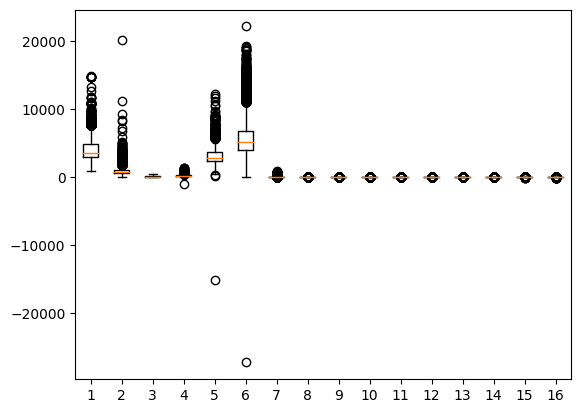

In [166]:
plt.boxplot(creedicuanti)

In [167]:
q1 = creedicuanti['precio'].quantile(0.25)
q2 = creedicuanti['precio'].quantile(0.75)
iqr1 = q2 - q1

lower_bound1 = q1 - 1.5 * iqr1
upper_bound1 = q2 + 1.5 * iqr1


In [168]:
creedicuanti['precio'] = np.where(creedicuanti['precio'] > upper_bound1, upper_bound1, creedicuanti['precio'])

creedicuanti['precio'] = np.where(creedicuanti['precio'] < lower_bound1, lower_bound1, creedicuanti['precio'])

<ipython-input-168-3be10e9433a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['precio'] = np.where(creedicuanti['precio'] > upper_bound1, upper_bound1, creedicuanti['precio'])
<ipython-input-168-3be10e9433a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['precio'] = np.where(creedicuanti['precio'] < lower_bound1, lower_bound1, creedicuanti['precio'])


In [169]:
q3 = creedicuanti['enganche'].quantile(0.25)
q4 = creedicuanti['enganche'].quantile(0.75)
iqr2 = q4 - q3

lower_bound2 = q3 - 1.5 * iqr2
upper_bound2 = q4 + 1.5 * iqr2


In [170]:
creedicuanti['enganche'] = np.where(creedicuanti['enganche'] > upper_bound2, upper_bound2, creedicuanti['enganche'])

creedicuanti['enganche'] = np.where(creedicuanti['enganche'] < lower_bound2, lower_bound2, creedicuanti['enganche'])

<ipython-input-170-9c0f65297628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['enganche'] = np.where(creedicuanti['enganche'] > upper_bound2, upper_bound2, creedicuanti['enganche'])
<ipython-input-170-9c0f65297628>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['enganche'] = np.where(creedicuanti['enganche'] < lower_bound2, lower_bound2, creedicuanti['enganche'])


In [171]:
q5 = creedicuanti['semana'].quantile(0.25)
q6 = creedicuanti['semana'].quantile(0.75)
iqr3 = q6 - q5

lower_bound3 = q5 - 1.5 * iqr3
upper_bound3 = q6 + 1.5 * iqr3

In [172]:
creedicuanti['semana'] = np.where(creedicuanti['semana'] > upper_bound3, upper_bound3, creedicuanti['semana'])

creedicuanti['semana'] = np.where(creedicuanti['semana'] < lower_bound3, lower_bound3, creedicuanti['semana'])

<ipython-input-172-a1bd1cf4da6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['semana'] = np.where(creedicuanti['semana'] > upper_bound3, upper_bound3, creedicuanti['semana'])
<ipython-input-172-a1bd1cf4da6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['semana'] = np.where(creedicuanti['semana'] < lower_bound3, lower_bound3, creedicuanti['semana'])


In [173]:
q7 = creedicuanti['monto_financiado'].quantile(0.25)
q8 = creedicuanti['monto_financiado'].quantile(0.75)
iqr4 = q7 - q8

lower_bound4 = q7 - 1.5 * iqr4
upper_bound4 = q8 + 1.5 * iqr4

In [174]:
creedicuanti['monto_financiado'] = np.where(creedicuanti['monto_financiado'] > upper_bound4, upper_bound4, creedicuanti['monto_financiado'])

creedicuanti['monto_financiado'] = np.where(creedicuanti['monto_financiado'] < lower_bound4, lower_bound4, creedicuanti['monto_financiado'])

<ipython-input-174-6c4aad4e1b1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['monto_financiado'] = np.where(creedicuanti['monto_financiado'] > upper_bound4, upper_bound4, creedicuanti['monto_financiado'])
<ipython-input-174-6c4aad4e1b1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['monto_financiado'] = np.where(creedicuanti['monto_financiado'] < lower_bound4, lower_bound4, creedicuanti['monto_financiado'])


In [175]:
q9 = creedicuanti['costo_total'].quantile(0.25)
q10 = creedicuanti['costo_total'].quantile(0.75)
iqr5 = q9 - q10

lower_bound5 = q9 - 1.5 * iqr5
upper_bound5 = q10 + 1.5 * iqr5

In [176]:
creedicuanti['costo_total'] = np.where(creedicuanti['costo_total'] > upper_bound5, upper_bound5, creedicuanti['costo_total'])

creedicuanti['costo_total'] = np.where(creedicuanti['costo_total'] < lower_bound5, lower_bound5, creedicuanti['costo_total'])

<ipython-input-176-d77bd35ff1bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['costo_total'] = np.where(creedicuanti['costo_total'] > upper_bound5, upper_bound5, creedicuanti['costo_total'])
<ipython-input-176-d77bd35ff1bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['costo_total'] = np.where(creedicuanti['costo_total'] < lower_bound5, lower_bound5, creedicuanti['costo_total'])


In [177]:
q11 = creedicuanti['monto_accesorios'].quantile(0.25)
q12 = creedicuanti['monto_accesorios'].quantile(0.75)
iqr6 = q11 - q12

lower_bound6 = q11 - 1.5 * iqr6
upper_bound6 = q12 + 1.5 * iqr6

In [178]:
creedicuanti['monto_accesorios'] = np.where(creedicuanti['monto_accesorios'] > upper_bound6, upper_bound6, creedicuanti['monto_accesorios'])

creedicuanti['monto_accesorios'] = np.where(creedicuanti['monto_accesorios'] < lower_bound6, lower_bound6, creedicuanti['monto_accesorios'])

<ipython-input-178-a5dbd5681ea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['monto_accesorios'] = np.where(creedicuanti['monto_accesorios'] > upper_bound6, upper_bound6, creedicuanti['monto_accesorios'])
<ipython-input-178-a5dbd5681ea7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['monto_accesorios'] = np.where(creedicuanti['monto_accesorios'] < lower_bound6, lower_bound6, creedicuanti['monto_accesorios'])


In [179]:
cuali=[['folio','tag','folio_solicitud','fecha','marca','modelo','plazo','agente_venta','dis_venta','empresa','fecha_ultimo_pago','fecha_pago_proximo','status_cuenta','razones_buro','semana_actual','codigo_postal','riesgo_categorizado']]

In [182]:
credi= pd.concat([creedicuanti,cuali], axis=1)
credi

TypeError: ignored

In [183]:
credi.to_csv('Propuesta uno')